In [1]:
import data
import preprocessing
import exportation
import settings

import joblib

import matplotlib.pyplot as plt
import matplotlib as mplt
import seaborn as sns
import pandas as pd
import numpy as np


# *****************************************************************
# ------------------------ Program parameters ---------------------
# *****************************************************************

enseigne = 'Auchan'

# Exploration des données d'entrainement

In [2]:
df = data.data_extraction.BDD_Promo('BigQuery', enseigne)


Querying BigQuery for training data...
Querying and loading time = 99.56 s 
Request finished



In [3]:
#Data Cleaning
df_clean,id_cols = preprocessing.training_set_preprocessing.training_set_cleaning(df)

print('Dataframe shape :', df_clean.shape)

Cleaning Data...
Data cleansing done

Dataframe shape : (217430, 34)


In [4]:
df_clean.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Confirmation,217430,1,Acceptée,217430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annee,217430,3,2019-01-01,79494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SemaineDebut,217430,NaN,NaN,NaN,26.183,15.2496,1,12,27,41,52
NomOpe,217430,128,GRAND RDV 6,12494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateDebutConso,217430,123,2017-11-03,12494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateFinConso,217430,122,2017-11-09,12494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enseigne,217430,1,AUCHAN,217430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DirectionRegionale,217430,4,DFR DR NORD EST,95227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZoneCVR,217430,23,DFR CVR 21,27522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SecteurCM,217430,58,TERRITOIRE 2220,9158,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
if 'AUCHAN' in df_clean.Enseigne.unique():
      df_clean.drop(['CodeLot'], axis = 1)

In [6]:
df_clean.isna().sum()

Confirmation                         0
Annee                                0
SemaineDebut                         0
NomOpe                               0
DateDebutConso                       0
DateFinConso                         0
Enseigne                             0
DirectionRegionale                   0
ZoneCVR                              0
SecteurCM                            0
NomMagasin                           0
Superficie                        5513
CodeMagasin                          0
CAMagasin                            0
IndiceMagPromophile                  0
CodeSAPProduit                       0
EANProduit                           0
NomProduit                           0
UmbrellaBrand                        0
NBPotsParUC                          0
FlagInno                             0
DureeEnJoursDepuisLancement          0
TotalVentesMarqueUC               1673
IndiceMarquePromophile            1673
VentesTotalesProductBrandEnUC    33783
Mecanique                

## Visualisation

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

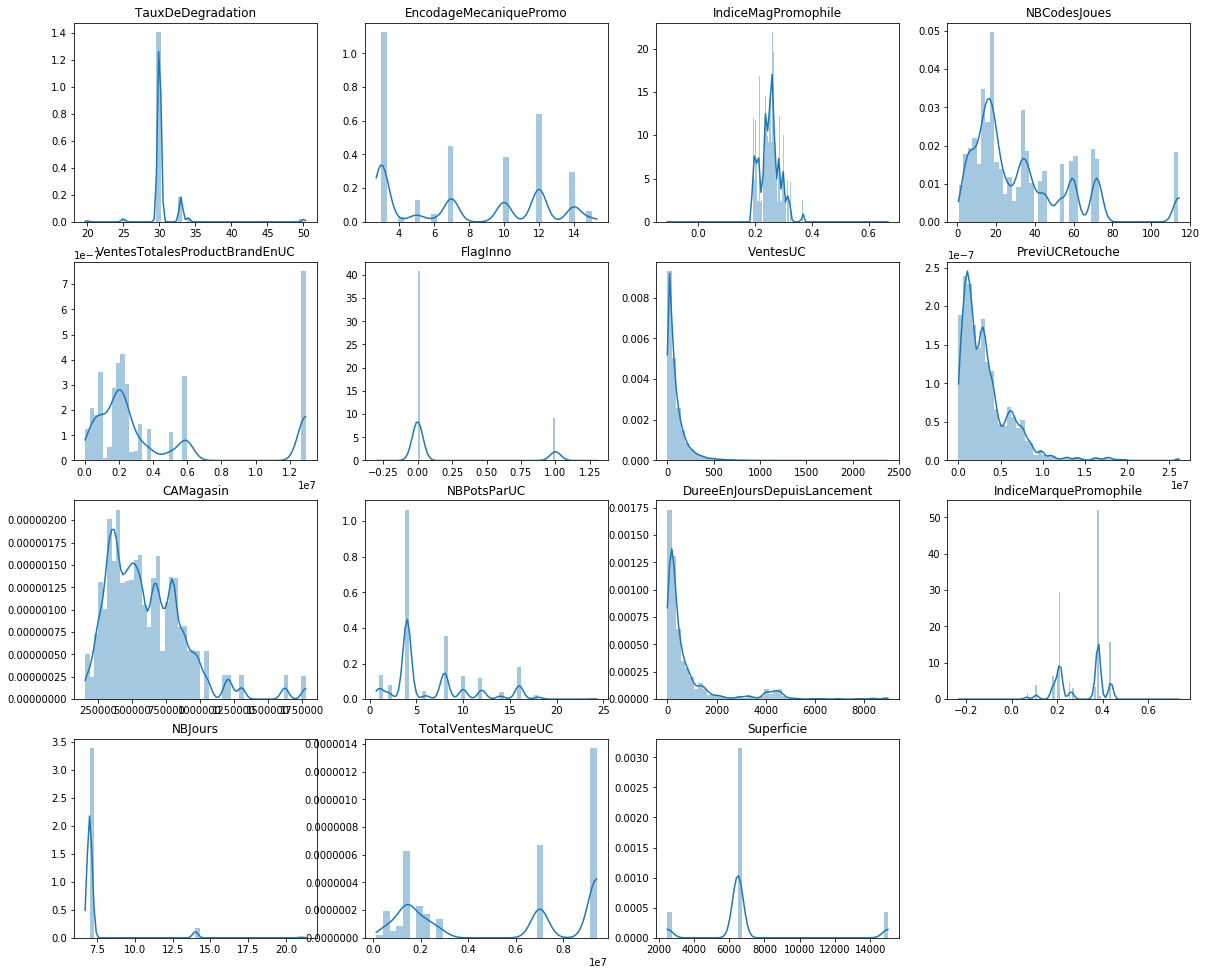

In [7]:
fig = plt.figure
fig(figsize =(20,30))
i=0

df_clean = df_clean.dropna()

for col in set(df_clean.columns) - set(id_cols):
    plt.subplot(7, 4, i + 1)
    plt.title(col)
    sns.distplot(df_clean[[col]] , kde_kws = {'bw':0.1})
    i+=1

plt.tight_layout

## Analyse de Correlation

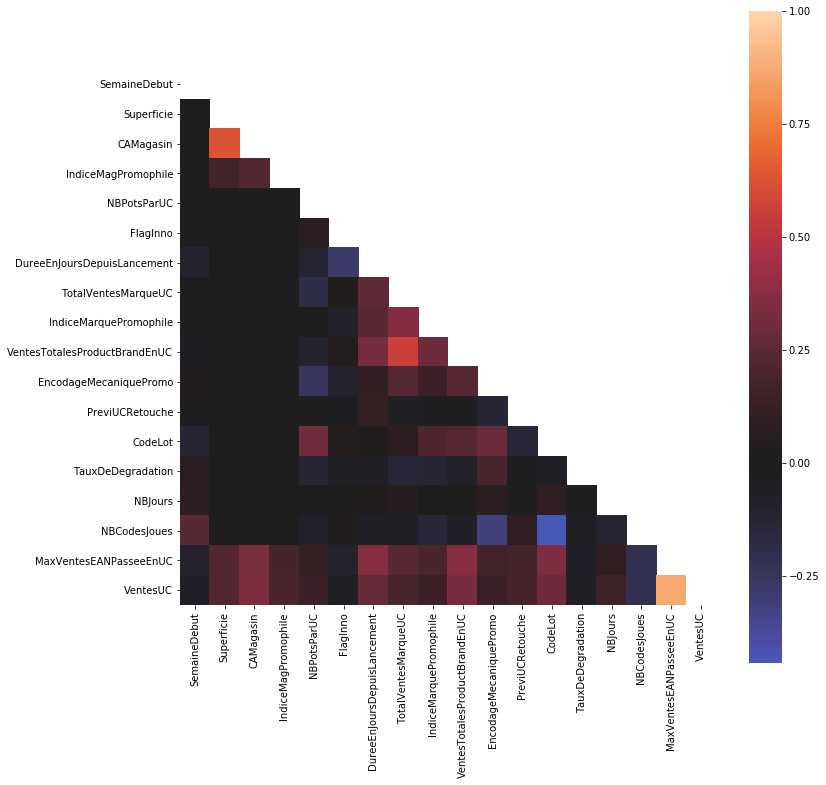

In [8]:
X_corr = df_clean.corr()
mask = np.zeros_like(X_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (12,12))

sns.heatmap(X_corr, center=0, square = True, mask = mask)

## Création du DataFrame encodée et transformé pour entrainement

In [9]:
df_transform = preprocessing.training_set_preprocessing.data_forward_transform(df_clean)

df_transform.describe(include = 'all').transpose()

Transforming skewed columns for Normal distribution approximation...


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Confirmation,173070,1,Acceptée,173070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annee,173070,3,2019-01-01,77464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SemaineDebut,173070,NaN,NaN,NaN,26.4903,15.1374,1,13,27,41,52
NomOpe,173070,115,OCTOBRE N° 4 Tract - 2019,7504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateDebutConso,173070,110,2019-10-23,7504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateFinConso,173070,109,2019-09-10,9447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enseigne,173070,1,AUCHAN,173070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DirectionRegionale,173070,4,DFR DR NORD EST,73313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZoneCVR,173070,23,DFR CVR 21,22474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SecteurCM,173070,57,TERRITOIRE 2220,7485,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

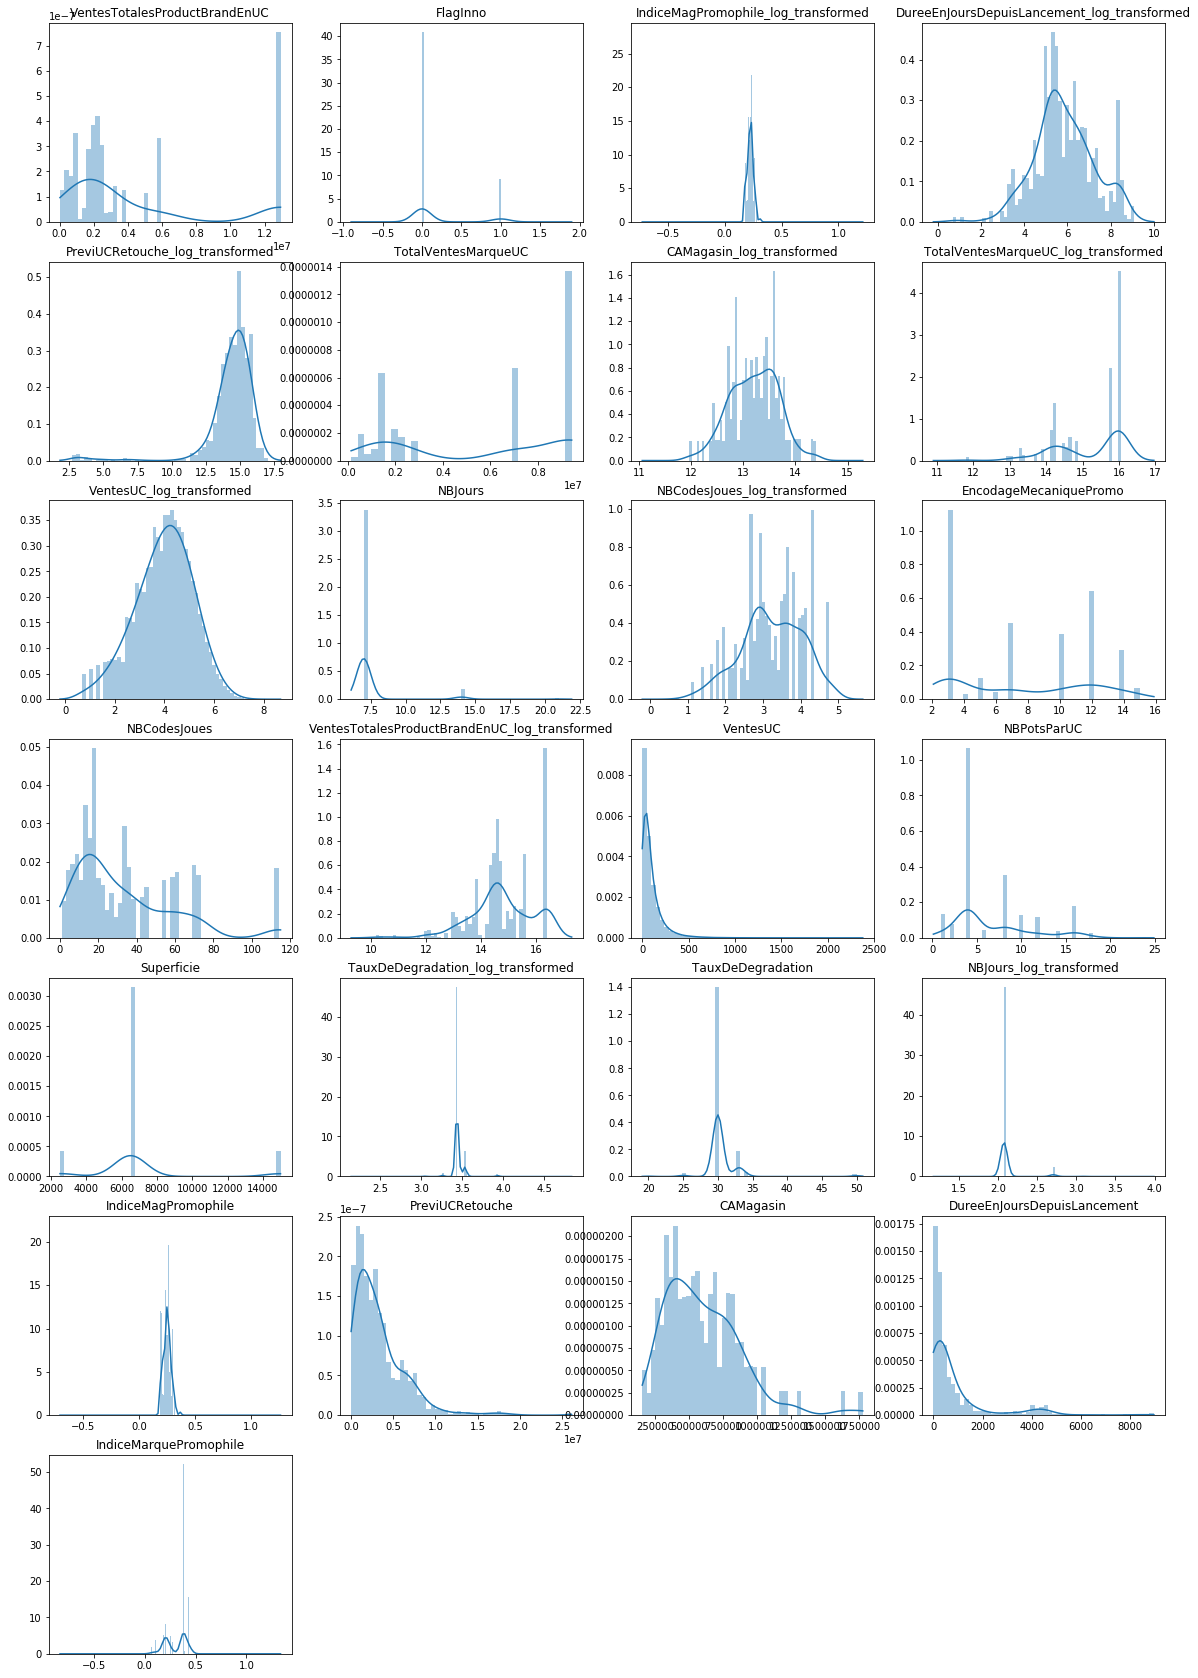

In [10]:
fig = plt.figure
fig(figsize =(20,30))
i=0
for col in set(df_transform.columns) - set(id_cols):
    plt.subplot(7, 4, i + 1)
    plt.title(col)
    sns.distplot(df_transform[[col]],  kde_kws={'bw':0.3})
    i+=1

plt.tight_layout

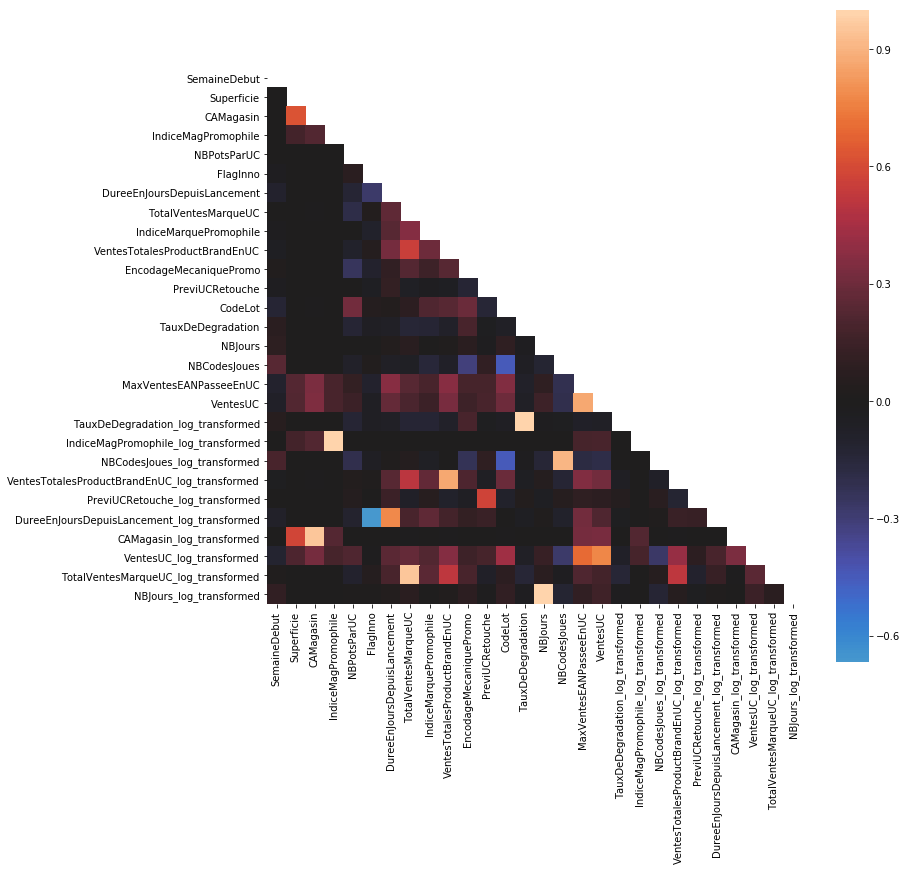

In [11]:
X_corr = df_transform.corr()
mask = np.zeros_like(X_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (12,12))

sns.heatmap(X_corr, center=0, square = True, mask = mask)

## Encodage des données catégoriques

In [12]:
df_encoded = preprocessing.training_set_preprocessing.feature_encoding(df_clean)

df_encoded.isna().sum()

Feature encoding...
Feature encoding done



Confirmation                                     0
Annee                                            0
SemaineDebut                                     0
NomOpe                                           0
DateDebutConso                                   0
DateFinConso                                     0
Enseigne                                         0
DirectionRegionale                               0
ZoneCVR                                          0
SecteurCM                                        0
NomMagasin                                       0
Superficie                                       0
CodeMagasin                                      0
CAMagasin                                        0
IndiceMagPromophile                              0
CodeSAPProduit                                   0
EANProduit                                       0
NomProduit                                       0
UmbrellaBrand                                    0
NBPotsParUC                    

In [13]:
%matplotlib inline
from pdpbox import pdp, get_dataset, info_plots

ImportError: No module named 'pdpbox'

In [ ]:
ross_data = df_encoded.copy()
ross_features = df_encoded.columns
ross_target = 'VentesUC_log_transformed'

In [ ]:
ross_features

In [ ]:
fig, axes, summary_df = info_plots.target_plot(         df=ross_data, 
                                                        feature='PreviUCRetouche_log_transformed', 
                                                        feature_name='PreviUCRetouche_log_transformed', 
                                                        target=ross_target,
                                                        show_percentile=True
                                                        )